## Exploring Data and Linear Regression

We will download the Ames, Iowa house pricing data from github. The file itself is a CSV with column headers and so we will use pandas to read it in as a data frame. I have put the data on Canvas.

The first step in any data analysis is to understand the data set at a high level, where its coming from and what it indicates:
 
DESCRIPTIVE ABSTRACT: Data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.<br> 

SOURCES:  Ames, Iowa Assessor’s Office  

VARIABLE DESCRIPTIONS:  Tab characters are used to separate variables in the data file. The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers). <br> 

Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data<br>
  


##### Follow the Newton house example file in lecture notes.   For the numerical features, finish the following questions:

1) Display histograms for the numerical features.  <br> 
2) Construct the scatter plots of price with each of the numerical features. <br> 
3) Display the correlation histogram. (optional) <br> 
4) Using numerical features to predict the renting price by linear regression. (You can use the least squares formula or use the scikit-learn library)  <br> 
5) Write down the predict function from (4) <br> 
6) Calculate the RSS cost for your model.    <br> 
 
 

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
ames = pd.read_csv("Amestrain.csv", error_bad_lines=False)
ames

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
z = ames['GrLivArea']+ames['BsmtUnfSF']<4000
print("Number of records removed:",len(ames) - sum(z))
data = ames[z]
data.head(5)

Number of records removed: 24


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
data = data.select_dtypes(include=['int64','float64'])
display(data.head(10))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,118000


In [10]:
CleanData=data.dropna()
# Cleaned Data (You can start from here.)
CleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1100 non-null   int64  
 1   MSSubClass     1100 non-null   int64  
 2   LotFrontage    1100 non-null   float64
 3   LotArea        1100 non-null   int64  
 4   OverallQual    1100 non-null   int64  
 5   OverallCond    1100 non-null   int64  
 6   YearBuilt      1100 non-null   int64  
 7   YearRemodAdd   1100 non-null   int64  
 8   MasVnrArea     1100 non-null   float64
 9   BsmtFinSF1     1100 non-null   int64  
 10  BsmtFinSF2     1100 non-null   int64  
 11  BsmtUnfSF      1100 non-null   int64  
 12  TotalBsmtSF    1100 non-null   int64  
 13  1stFlrSF       1100 non-null   int64  
 14  2ndFlrSF       1100 non-null   int64  
 15  LowQualFinSF   1100 non-null   int64  
 16  GrLivArea      1100 non-null   int64  
 17  BsmtFullBath   1100 non-null   int64  
 18  BsmtHalf

In [11]:
CleanData

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [12]:
names = list(CleanData)
print(names)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [13]:
XData=CleanData.drop(columns=['SalePrice'])
XData.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [14]:
X=XData.values

In [15]:
len(X[0]) #

37

In [16]:
len(X)  

1100

In [17]:
Y=CleanData.SalePrice.values.reshape(-1, 1)
len(Y)

1100

In [18]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 

In [19]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 

In [20]:
display(type(ames))
display(ames.head(5))
display(ames.tail(5))
print("Our datasets has dimensions", ames.shape)

pandas.core.frame.DataFrame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Our datasets has dimensions (1460, 81)


In [21]:
names = list(CleanData)
print(CleanData)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       1

In [22]:
CleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1100 non-null   int64  
 1   MSSubClass     1100 non-null   int64  
 2   LotFrontage    1100 non-null   float64
 3   LotArea        1100 non-null   int64  
 4   OverallQual    1100 non-null   int64  
 5   OverallCond    1100 non-null   int64  
 6   YearBuilt      1100 non-null   int64  
 7   YearRemodAdd   1100 non-null   int64  
 8   MasVnrArea     1100 non-null   float64
 9   BsmtFinSF1     1100 non-null   int64  
 10  BsmtFinSF2     1100 non-null   int64  
 11  BsmtUnfSF      1100 non-null   int64  
 12  TotalBsmtSF    1100 non-null   int64  
 13  1stFlrSF       1100 non-null   int64  
 14  2ndFlrSF       1100 non-null   int64  
 15  LowQualFinSF   1100 non-null   int64  
 16  GrLivArea      1100 non-null   int64  
 17  BsmtFullBath   1100 non-null   int64  
 18  BsmtHalf

In [23]:
CleanData["YearBuilt"].value_counts()

2005    63
2006    61
2004    45
2007    44
2003    36
        ..
1898     1
1892     1
1882     1
1985     1
2010     1
Name: YearBuilt, Length: 108, dtype: int64

In [24]:
CleanData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,727.848182,56.222727,69.970909,9949.203636,6.157273,5.560000,1971.974545,1985.339091,101.234545,434.083636,...,90.706364,44.280909,22.228182,3.412727,15.731818,2.050000,23.876364,6.343636,2007.797273,181011.374545
std,421.126309,42.085428,22.897506,7922.159443,1.328552,1.060945,30.675846,21.063458,174.253550,434.798896,...,121.100745,61.213986,61.791702,30.052012,56.716445,34.108459,167.304072,2.679770,1.336065,73932.814827
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,365.500000,20.000000,60.000000,7560.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,728.500000,50.000000,70.000000,9327.000000,6.000000,5.000000,1973.000000,1995.000000,0.000000,377.500000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1091.250000,70.000000,80.000000,11248.250000,7.000000,6.000000,2003.000000,2004.000000,165.250000,700.500000,...,168.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,611657.000000


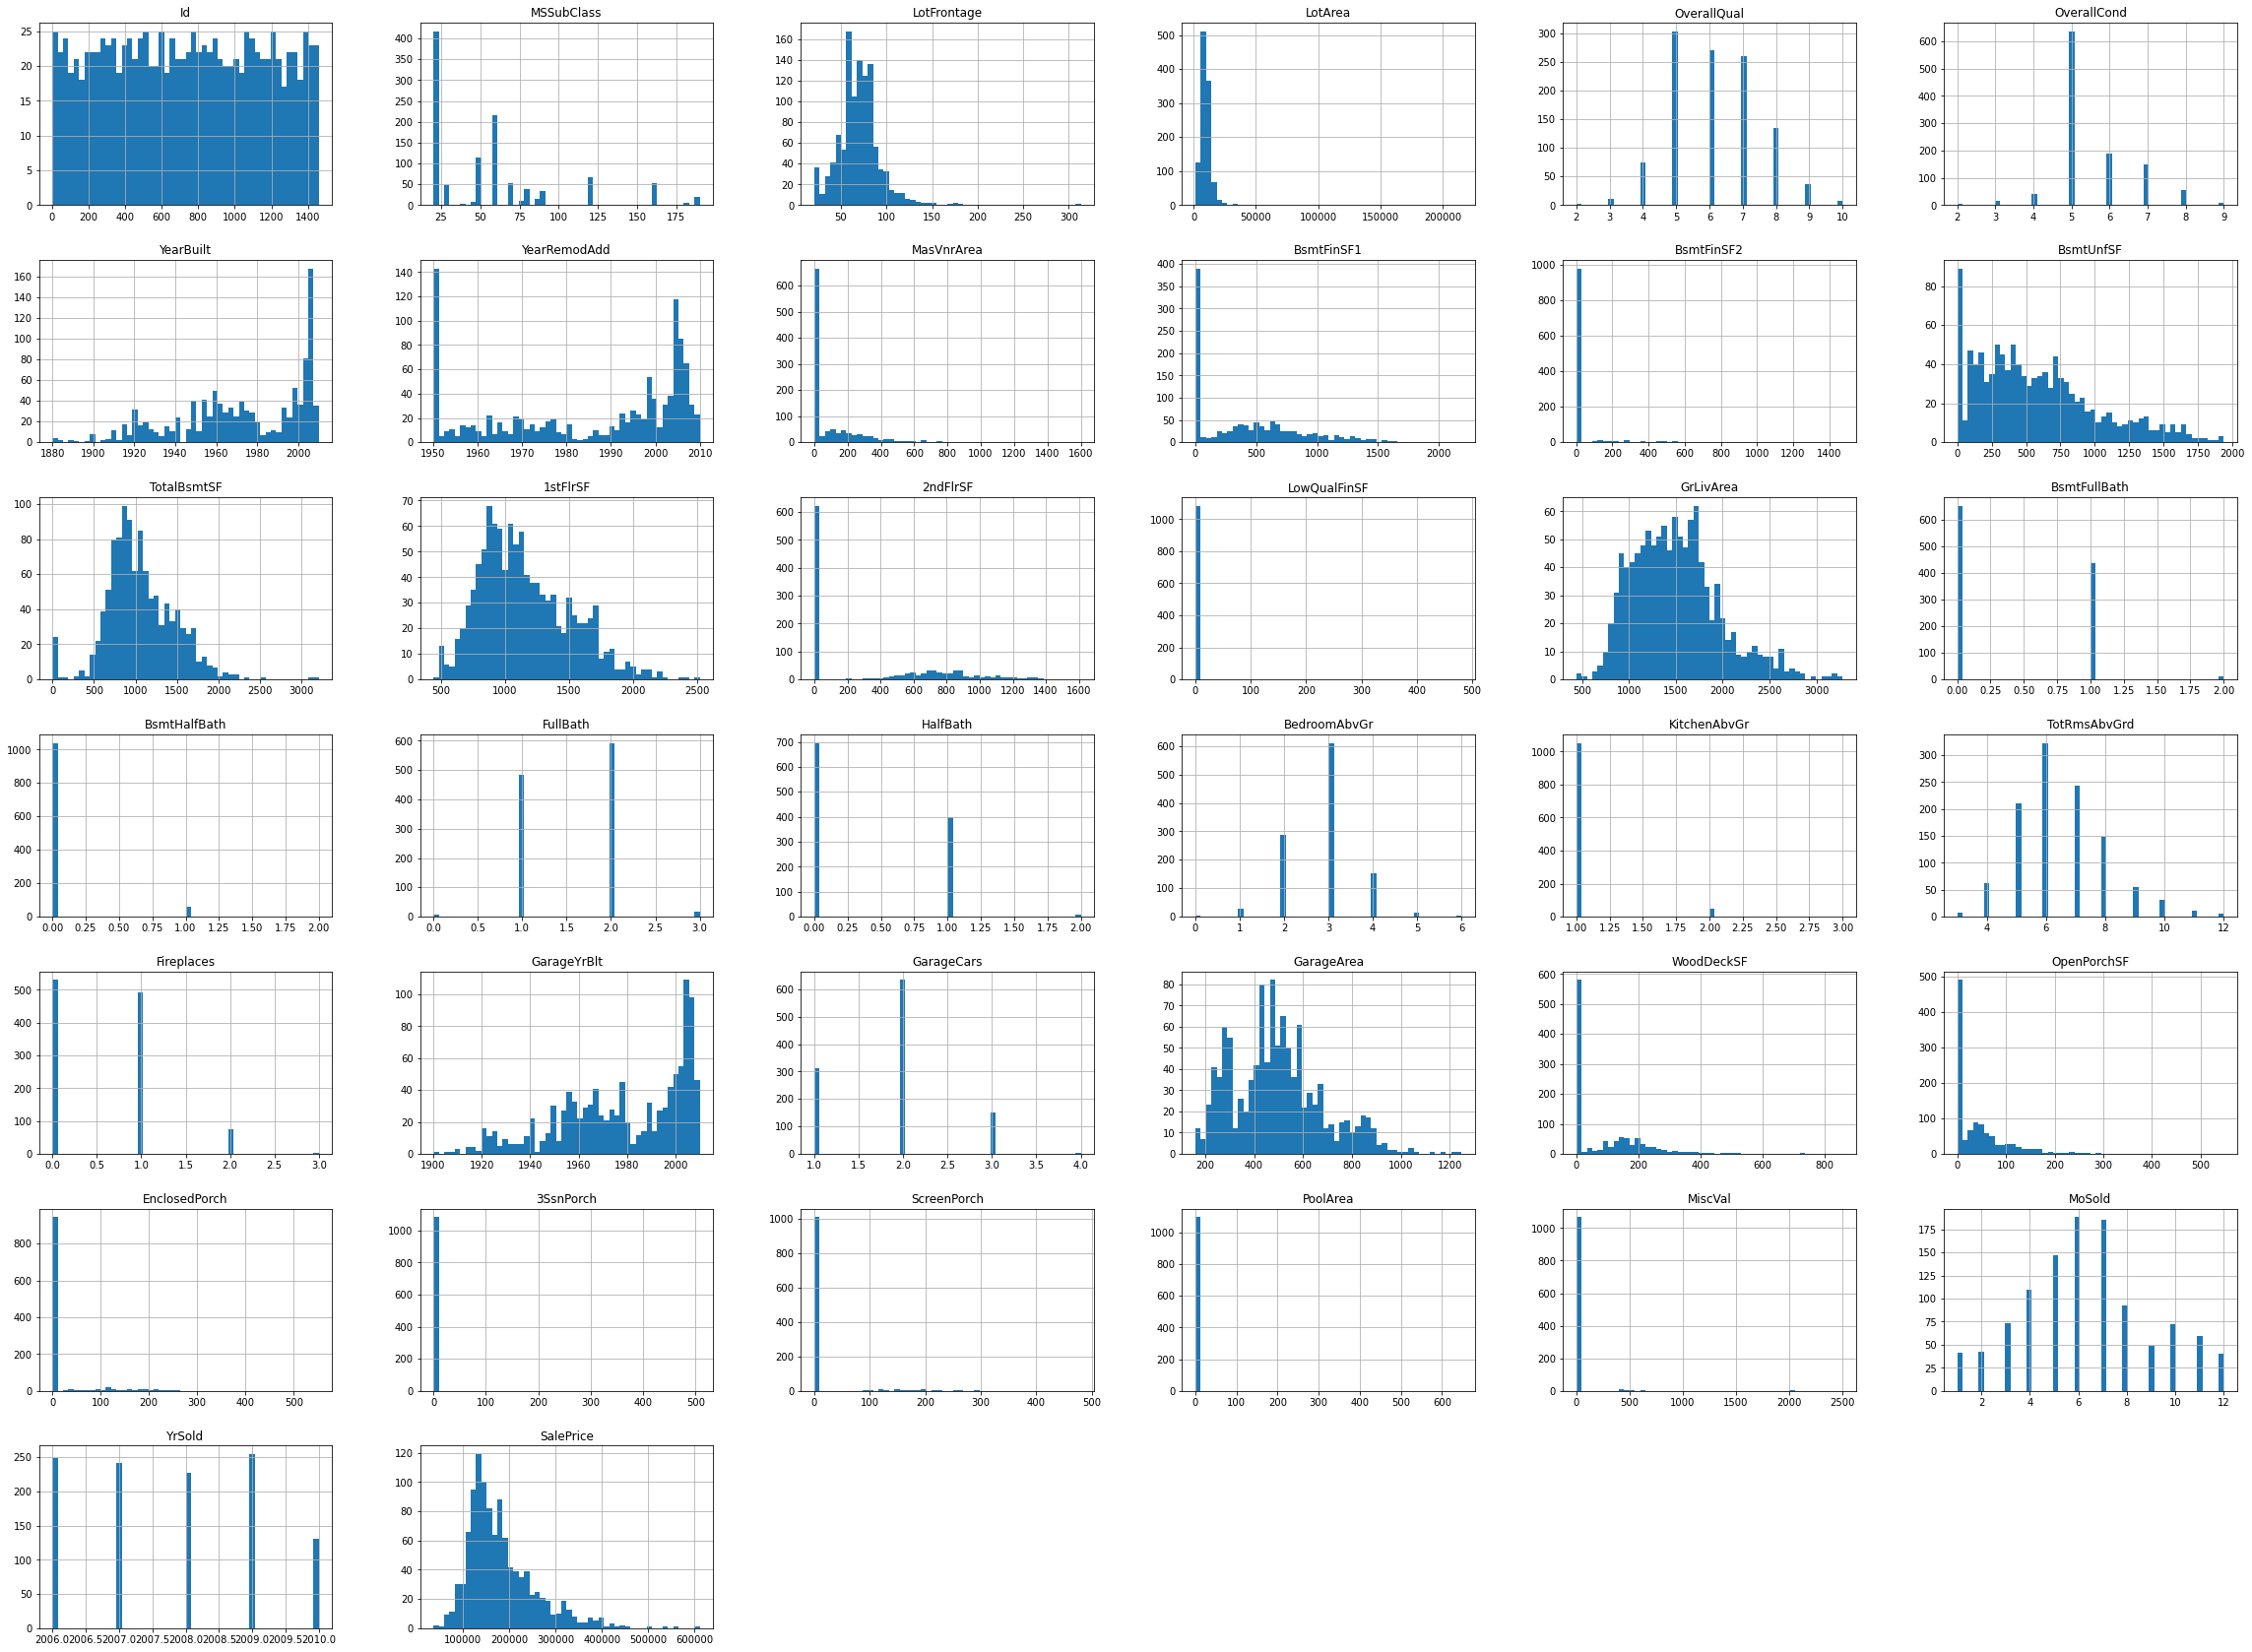

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
CleanData.hist(bins=50, figsize=(40,30))
#save_fig("attribute_histogram_plots")
plt.show()

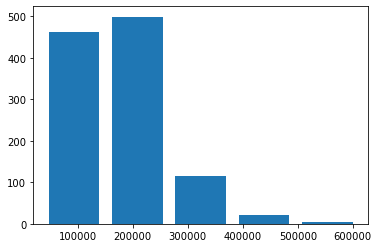

In [26]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

ax.hist(CleanData.SalePrice,bins=5, rwidth=.8)
plt.show()

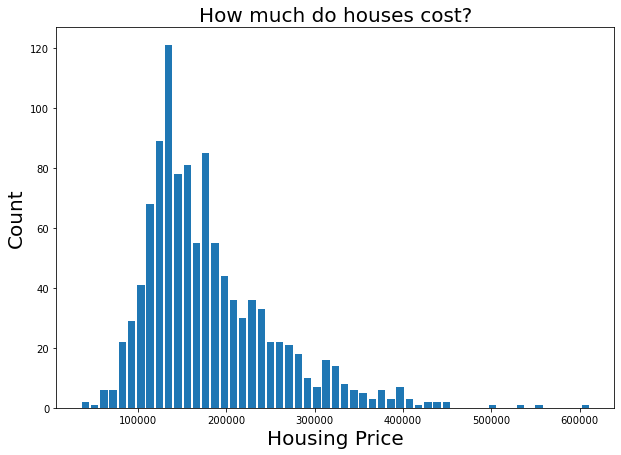

In [27]:
fig, ax = plt.subplots()

ax.hist(CleanData.SalePrice,bins=55, rwidth=.8)
ax.set_xlabel("Housing Price", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
ax.set_title("How much do houses cost?", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

In [28]:
print("Minimum Housing Cost:", min(CleanData.SalePrice))
print("Minimum Housing Cost:", max(CleanData.SalePrice))
print("Minimum Housing Cost:", np.mean(CleanData.SalePrice))

Minimum Housing Cost: 35311
Minimum Housing Cost: 611657
Minimum Housing Cost: 181011.37454545454


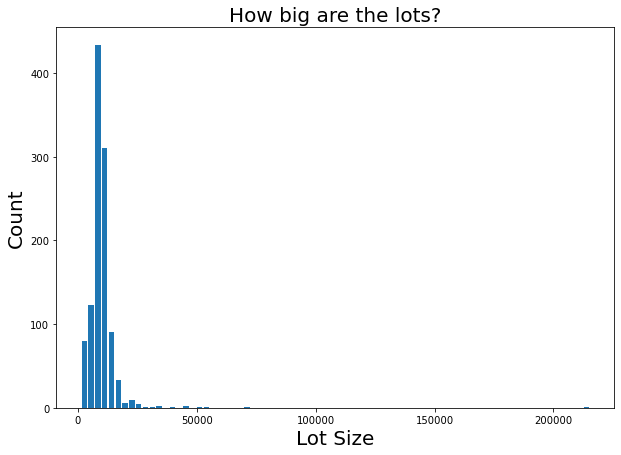

In [29]:
fig, ax = plt.subplots()
amesLot=CleanData.LotArea
ax.hist(amesLot, bins=75, rwidth=.8)
ax.set_xlabel("Lot Size", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
ax.set_title("How big are the lots?", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

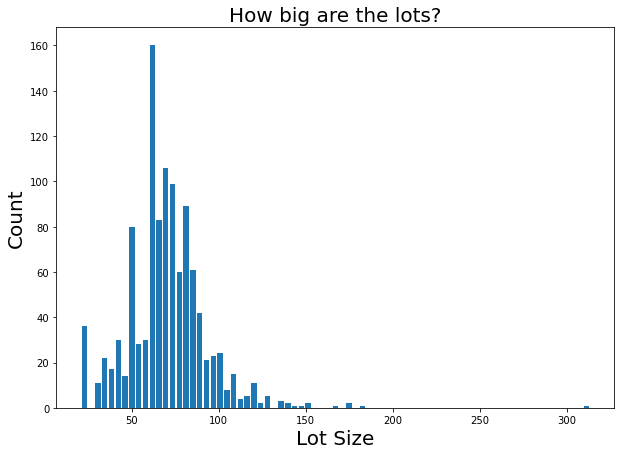

In [30]:
fig, ax = plt.subplots()
amesLot=CleanData.LotFrontage
ax.hist(amesLot, bins=75, rwidth=.8)
ax.set_xlabel("Lot Size", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
ax.set_title("How big are the lots?", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

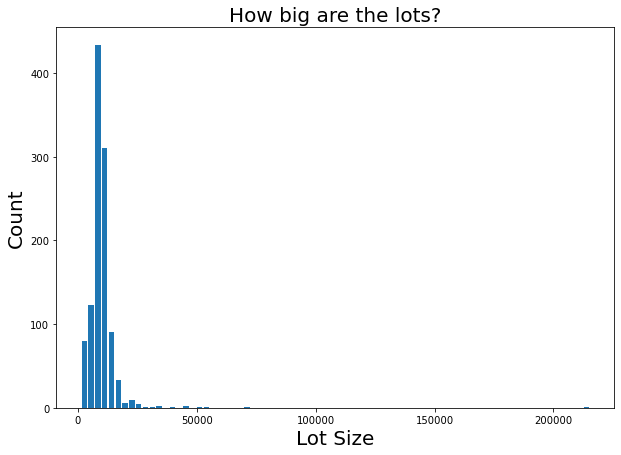

In [31]:
fig, ax = plt.subplots()
amesLot=CleanData.LotArea
ax.hist(amesLot, bins=75, rwidth=.8)
ax.set_xlabel("Lot Size", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
ax.set_title("How big are the lots?", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

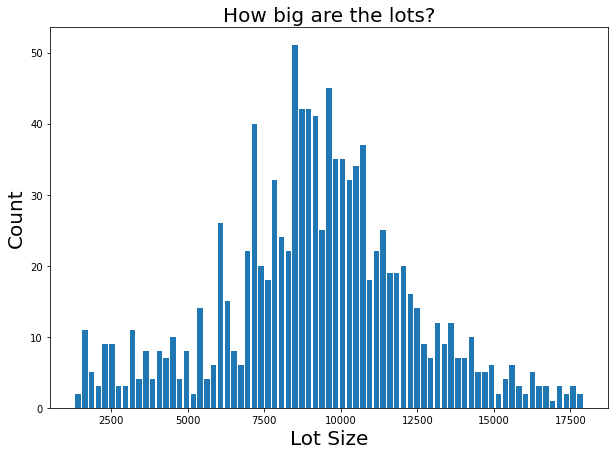

In [32]:
fig, ax = plt.subplots()

z = amesLot<18000

ax.hist(amesLot[z],bins=75, rwidth=.8)
ax.set_xlabel("Lot Size", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
ax.set_title("How big are the lots?", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

In [33]:
nums = CleanData.select_dtypes(include=['int64','float64'])
display(nums.head(5))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


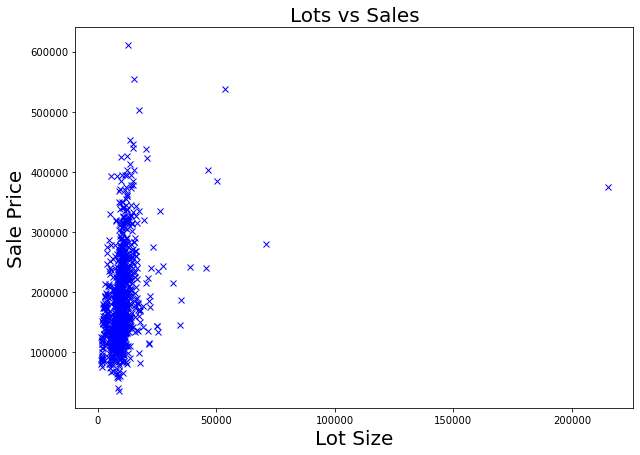

In [34]:
fig, ax = plt.subplots()
z = amesLot<18000
ax.plot(nums.LotArea,nums.SalePrice,'x',color='Blue')
ax.set_xlabel("Lot Size", fontsize=20)
ax.set_ylabel("Sale Price", fontsize=20)
ax.set_title("Lots vs Sales", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

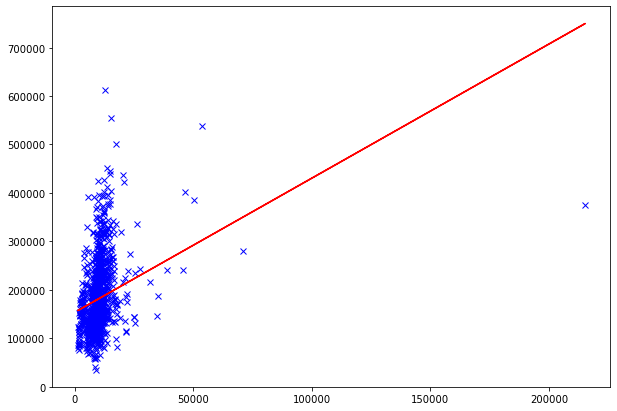

In [35]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 
z = amesLot<18000
linear_regressor = LinearRegression()  # create object for the class
X=nums.LotArea.values.reshape(-1, 1)
Y=nums.SalePrice.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
#plt.scatter(X, Y, color='Blue')
fig, ax = plt.subplots()

ax.plot(X,Y,'x',color='Blue')
plt.plot(X, Y_pred, color='red')
fig.set_size_inches(10, 7) 
plt.show()

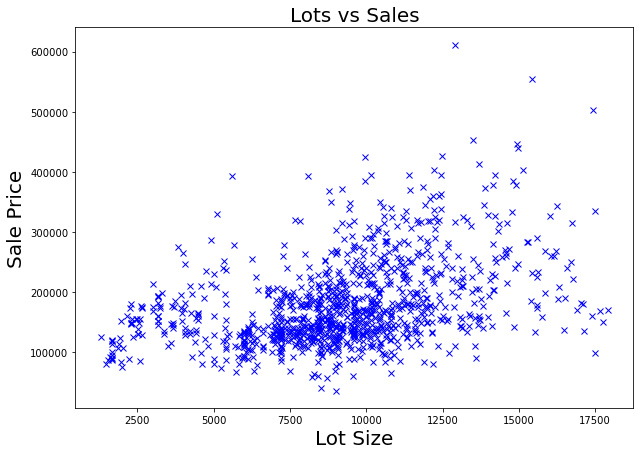

In [36]:
fig, ax = plt.subplots()

ax.plot(nums[z].LotArea,nums[z].SalePrice,'x',color='Blue')
ax.set_xlabel("Lot Size", fontsize=20)
ax.set_ylabel("Sale Price", fontsize=20)
ax.set_title("Lots vs Sales", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

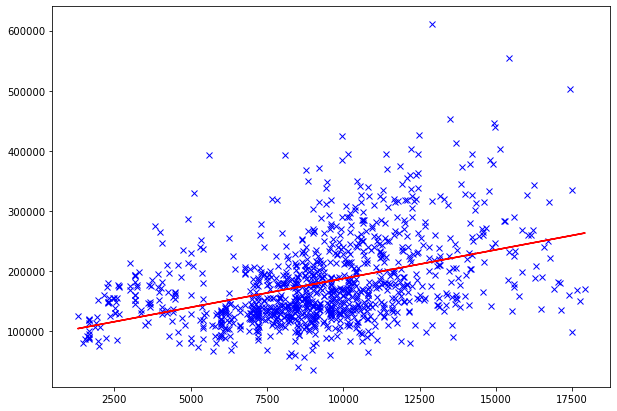

In [37]:
linear_regressor = LinearRegression()  # create object for the class
X=nums[z].LotArea.values.reshape(-1, 1)
Y=nums[z].SalePrice.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
#plt.scatter(X, Y, color='Blue')
fig, ax = plt.subplots()

ax.plot(X,Y,'x',color='Blue')
plt.plot(X, Y_pred, color='red')
fig.set_size_inches(10, 7) 
plt.show()

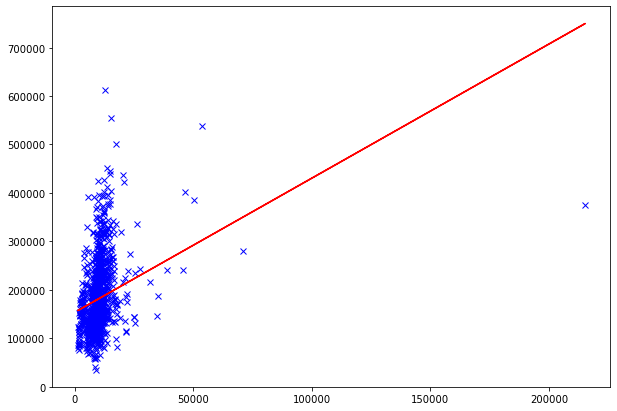

In [38]:
linear_regressor = LinearRegression()  # create object for the class
X=nums.LotArea.values.reshape(-1, 1)
Y=nums.SalePrice.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
#plt.scatter(X, Y, color='Blue')
fig, ax = plt.subplots()

ax.plot(X,Y,'x',color='Blue')
plt.plot(X, Y_pred, color='red')
fig.set_size_inches(10, 7) 
plt.show()

In [39]:
numsc = nums[z]

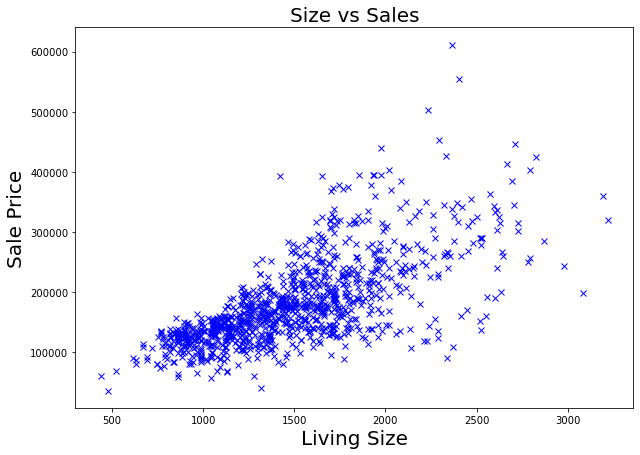

In [40]:
fig, ax = plt.subplots()

ax.plot(numsc.GrLivArea,numsc.SalePrice,'x',color='Blue')
ax.set_xlabel("Living Size", fontsize=20)
ax.set_ylabel("Sale Price", fontsize=20)
ax.set_title("Size vs Sales", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

In [41]:
numsc.GrLivArea.values

array([1710, 1262, 1786, ..., 2340, 1078, 1256])

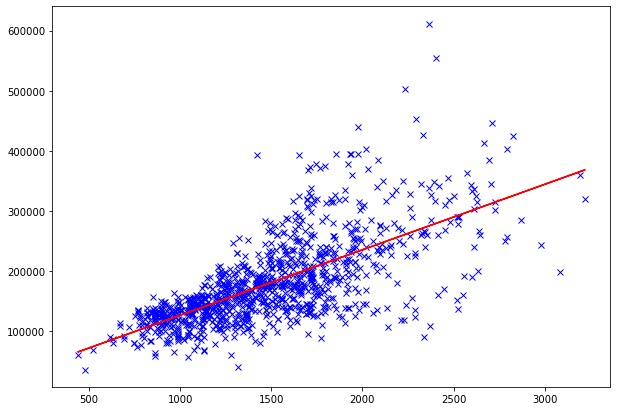

In [131]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 

linear_regressor = LinearRegression()  # create object for the class
X=numsc.GrLivArea.values.reshape(-1, 1)
Y=numsc.SalePrice.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
#plt.scatter(X, Y, color='Blue')
fig, ax = plt.subplots()

ax.plot(X,Y,'x',color='Blue')
plt.plot(X, Y_pred, color='red')
fig.set_size_inches(10, 7) 
plt.show()

In [132]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, Y)

# Make predictions using the testing set
Y_pred = regr.predict(X)

print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y, Y_pred))

Coefficients: 
 [[109.03025803]]
Mean squared error: 2744120724.19
Coefficient of determination: 0.47


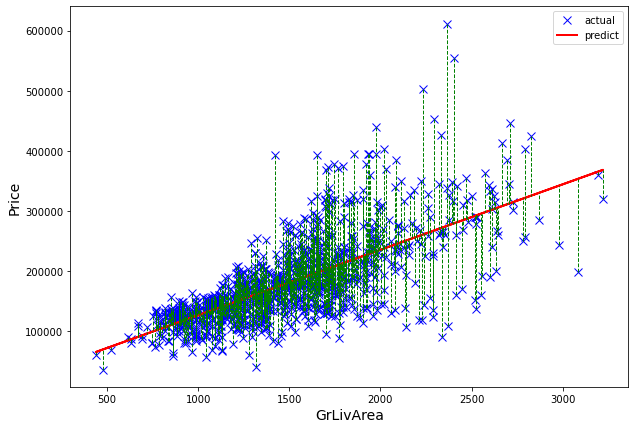

In [133]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(X,Y, 'bx', markersize=8, label='actual')
plt.plot(X, Y_pred, 'r-', linewidth=2, label='predict')

for i in range(len(X)):
    plt.plot([X[i], X[i]], [Y[i], Y_pred[i]],'g--',linewidth=1)

plt.legend()
plt.ylabel('Price', fontsize=14)
plt.xlabel('GrLivArea', fontsize=14)
#plt.title('Predict vs Actual', fontsize=25)
# ax[2].plot(names, values)
 
plt.show()

 


In [135]:
nums

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [79]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 
linear_regressor = LinearRegression()  # create object for the class
X1=numsc.GrLivArea.values.reshape(-1, 1)
X2=numsc.LotArea.values.reshape(-1, 1)
##X3=numsc.LotFrontage.values.reshape(-1, 1)
##X4=numsc.MasVnrArea.values.reshape(-1, 1)
X = np.array([X1[:,0],X2[:,0]]).T 

Y=numsc.SalePrice.values.reshape(-1, 1)
reg =linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
#plt.scatter(X, Y, color='Blue')
reg.coef_

array([[98.20090396,  3.96472002]])

In [80]:
reg.intercept_

array([-3646.10428309])

In [93]:
xx, yy = np.meshgrid(range(0,6000, 1000), range(0, 20000, 18000))
x = np.array([xx.flatten(),yy.flatten()]).T  
y_pred = linear_regressor.predict(x) 

In [94]:
xx.shape

(2, 6)

In [98]:
y_p=y_pred.flatten().reshape(2,6)

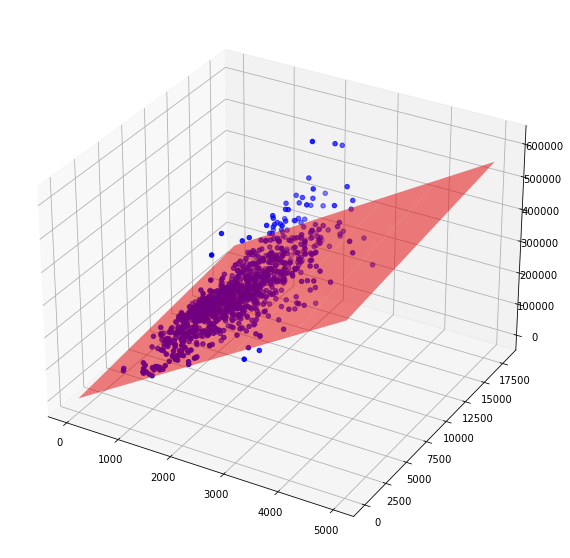

In [123]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter3D(X1, X2, Y, zdir='z', c=None,s=20,cmap='Blue',color='Blue')

# plot the plane
ax.plot_surface(xx, yy, y_p, alpha=0.5,color='red')
 
    
plt.show()

In [100]:
names

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [101]:
nnames = list(numsc)


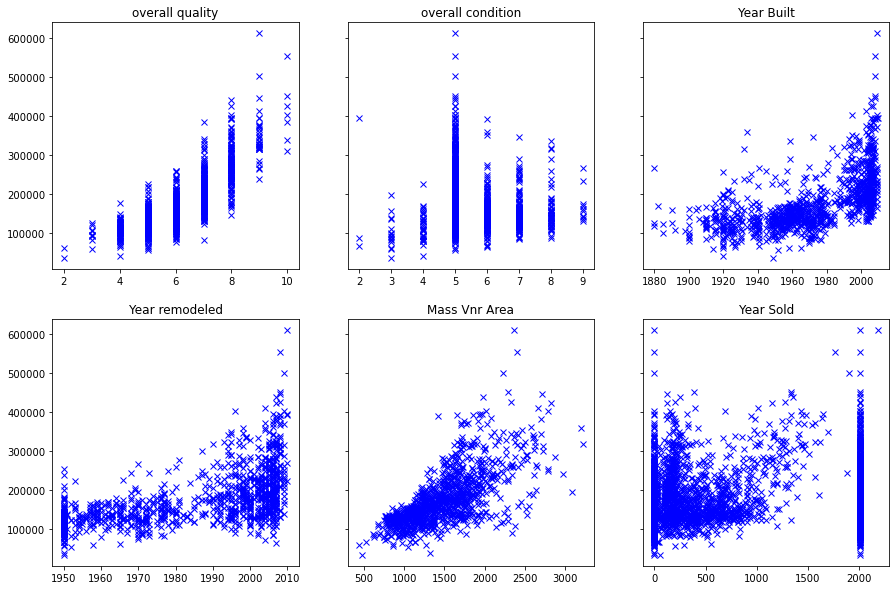

In [102]:
fig, axes = plt.subplots(2,3, sharey=True)
fig.set_size_inches(15, 10)

axes[0,0].plot(numsc.OverallQual,numsc.SalePrice,'x',color='Blue')
axes[0,0].set_title("overall quality", fontsize=12)
axes[0,1].plot(numsc.OverallCond,numsc.SalePrice,'x',color='Blue')
axes[0,1].set_title("overall condition", fontsize=12)
axes[0,2].plot(numsc.YearBuilt,numsc.SalePrice,'x',color='Blue')
axes[0,2].set_title("Year Built", fontsize=12)
axes[1,0].plot(numsc.YearRemodAdd,numsc.SalePrice,'x',color='Blue')
axes[1,0].set_title("Year remodeled", fontsize=12)
axes[1,1].plot(numsc.GrLivArea,numsc.SalePrice,'x',color='Blue')
axes[1,1].set_title("Mass Vnr Area", fontsize=12)
axes[1,2].plot(numsc.BsmtFinSF1,numsc.SalePrice,'x',color='Blue')
axes[1,2].set_title("Basement ", fontsize=12)
axes[1,2].plot(numsc.WoodDeckSF,numsc.SalePrice,'x',color='Blue')
axes[1,2].set_title("Wood Deck", fontsize=12)
axes[1,2].plot(numsc.YrSold,numsc.SalePrice,'x',color='Blue')
axes[1,2].set_title("Year Sold", fontsize=12)

plt.show()

In [105]:
nnames = list(numsc)
len(nnames)

38

In [106]:
A =  np.matrix([[0, 1],
                [2, 3],
                [4, 5],
                [6, 7]])
print(A)
print(A.reshape(2,4))
print(A.reshape(8))

[[0 1]
 [2 3]
 [4 5]
 [6 7]]
[[0 1 2 3]
 [4 5 6 7]]
[[0 1 2 3 4 5 6 7]]


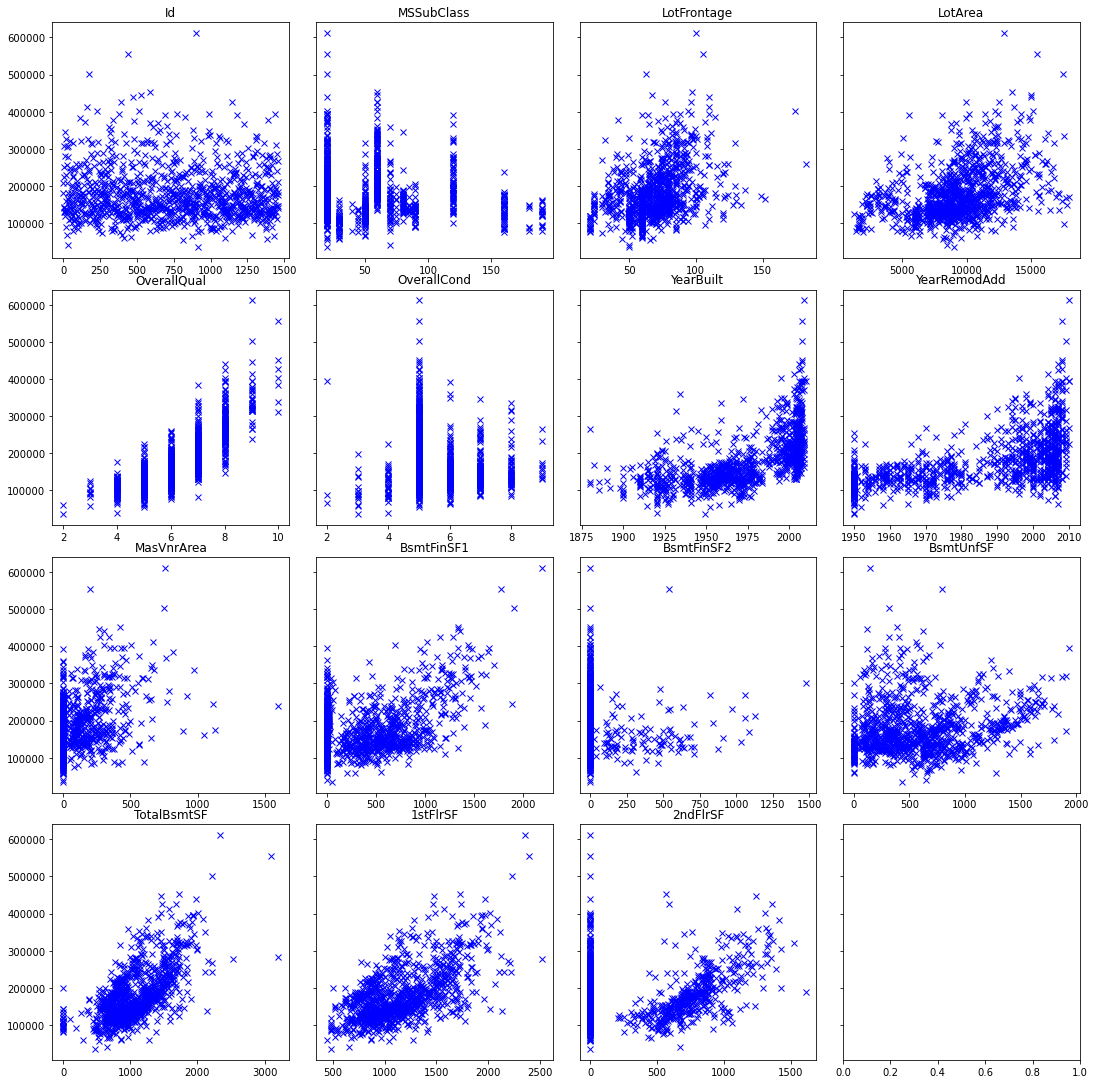

In [107]:
f, axes = plt.subplots(4, 4, sharey = True)
f.set_size_inches(15,15)
f.tight_layout()

axes = axes.reshape(16)

for i in range(0,15):
#    print(nnames[i])
    axes[i].plot(numsc[nnames[i]],numsc.SalePrice,'x',color='Blue')
    axes[i].set_title(nnames[i], fontsize=12)

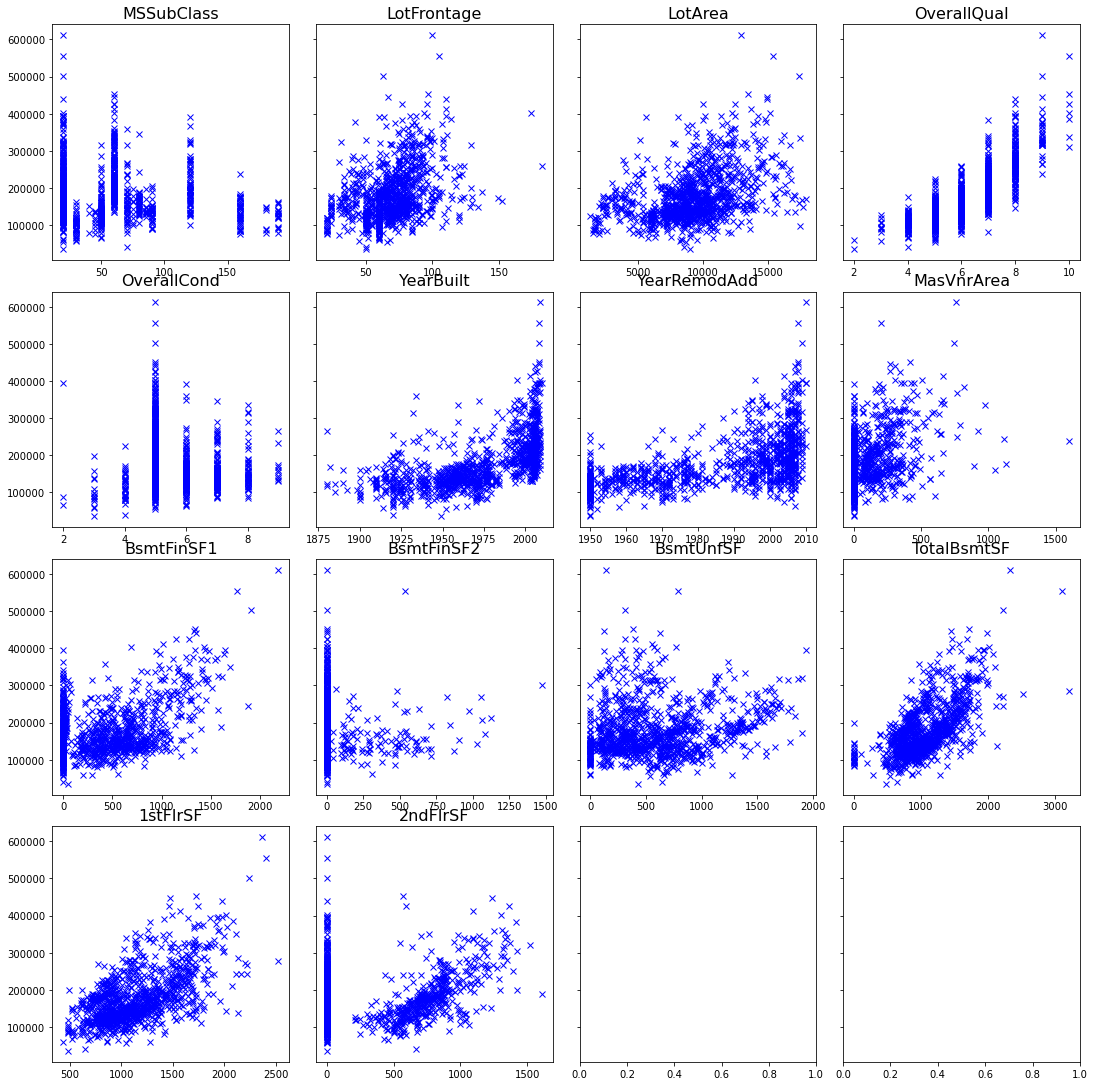

In [108]:
f, axes = plt.subplots(4, 4, sharey = True)
f.set_size_inches(15,15)
f.tight_layout()

axes = axes.reshape(16)

for i in range(0,14):
#    print(nnames[i])
    axes[i].plot(numsc[nnames[i+1]],numsc.SalePrice,'x',color='Blue')
    axes[i].set_title(nnames[i+1], fontsize=16)

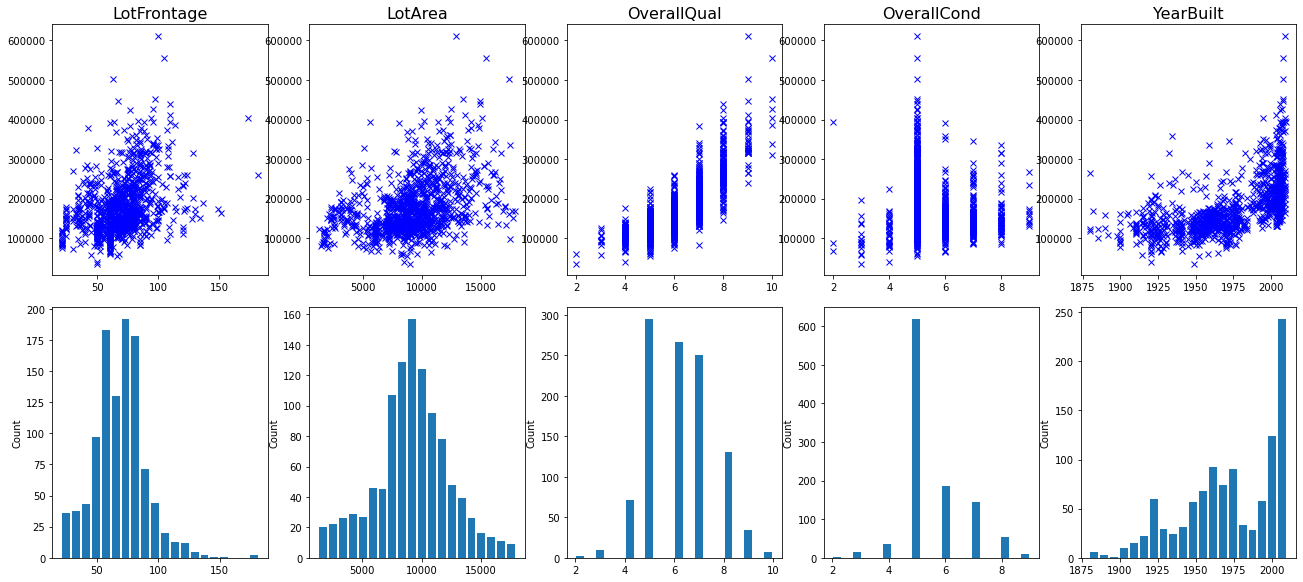

In [118]:
f, axes = plt.subplots(2, 5)
f.set_size_inches(18,8)
f.tight_layout()

axes = axes.reshape(10)

for i in range(1,6):
#    print(nnames[i])
    axes[i-1].plot(numsc[nnames[i+1]],numsc.SalePrice,'x',color='Blue')
    axes[i-1].set_title(nnames[i+1], fontsize=16)
    
    z = numsc[nnames[i+1]].notnull()
    axes[i+4].hist(numsc[nnames[i+1]][z],bins=20, rwidth=.8)
    axes[i+4].set_ylabel("Count")

In [119]:
numsc

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [120]:
ames1=numsc[['GrLivArea',
    'YearBuilt',
 'YearRemodAdd', 
 'LotArea',
 'OverallQual',
 'YrSold',
 'OverallCond','SalePrice']]

ames1.head()

,GrLivArea,YearBuilt,YearRemodAdd,LotArea,OverallQual,YrSold,OverallCond,SalePrice
0,1710,2003,2003,8450,7,2008,5,208500
1,1262,1976,1976,9600,6,2007,8,181500
2,1786,2001,2002,11250,7,2008,5,223500
3,1717,1915,1970,9550,7,2006,5,140000
4,2198,2000,2000,14260,8,2008,5,250000


In [121]:
ames1.describe()

,GrLivArea,YearBuilt,YearRemodAdd,LotArea,OverallQual,YrSold,OverallCond,SalePrice
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,1490.699438,1972.164794,1985.434457,9205.764981,6.155431,2007.802434,5.565543,179240.208801
std,451.098518,30.715903,21.018544,3116.254243,1.324627,1.335589,1.059793,71872.791593
min,438.000000,1880.000000,1950.000000,1300.000000,2.000000,2006.000000,2.000000,35311.000000
25%,1144.000000,1953.000000,1966.000000,7500.000000,5.000000,2007.000000,5.000000,130000.000000
50%,1458.000000,1974.000000,1995.000000,9202.000000,6.000000,2008.000000,5.000000,160600.000000
75%,1739.250000,2003.000000,2004.000000,11009.500000,7.000000,2009.000000,6.000000,212925.000000
max,3222.000000,2010.000000,2010.000000,17920.000000,10.000000,2010.000000,9.000000,611657.000000


In [113]:
ames1.corr()

,GrLivArea,YearBuilt,YearRemodAdd,LotArea,OverallQual,YrSold,OverallCond,SalePrice
GrLivArea,1.000000,0.218610,0.276769,0.395393,0.568862,-0.002920,-0.147385,0.684312
YearBuilt,0.218610,1.000000,0.632052,0.092060,0.614229,-0.001376,-0.416069,0.588763
YearRemodAdd,0.276769,0.632052,1.000000,0.090920,0.569421,0.046862,0.033894,0.561307
LotArea,0.395393,0.092060,0.090920,1.000000,0.234832,-0.022954,-0.053711,0.415599
OverallQual,0.568862,0.614229,0.569421,0.234832,1.000000,0.007308,-0.186182,0.812190
YrSold,-0.002920,-0.001376,0.046862,-0.022954,0.007308,1.000000,0.037960,0.010038
OverallCond,-0.147385,-0.416069,0.033894,-0.053711,-0.186182,0.037960,1.000000,-0.150994
SalePrice,0.684312,0.588763,0.561307,0.415599,0.812190,0.010038,-0.150994,1.000000


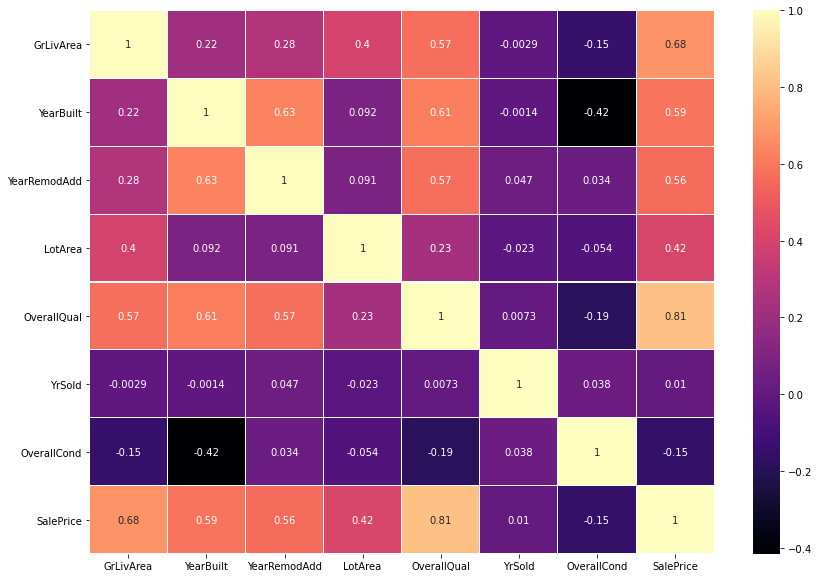

In [114]:
import pandas as pd
import seaborn as sns
fig,ax = plt.subplots(figsize=(14, 10))

#sns.set(font_scale=1.4)
sns.heatmap(ames1.corr(), ax=ax, linewidths=0.05,cmap="magma",annot=True)
plt.show()

In [115]:
ames1.var() 

GrLivArea       2.034899e+05
YearBuilt       9.434667e+02
YearRemodAdd    4.417792e+02
LotArea         9.711041e+06
OverallQual     1.754638e+00
YrSold          1.783799e+00
OverallCond     1.123160e+00
SalePrice       5.165698e+09
dtype: float64

In [116]:
ames1.cov()


,GrLivArea,YearBuilt,YearRemodAdd,LotArea,OverallQual,YrSold,OverallCond,SalePrice
GrLivArea,2.034899e+05,3.029036e+03,2624.162569,5.558183e+05,339.916489,-1.759530,-70.460600,2.218655e+07
YearBuilt,3.029036e+03,9.434667e+02,408.054860,8.811849e+03,24.991232,-0.056447,-13.544082,1.299775e+06
YearRemodAdd,2.624163e+03,4.080549e+02,441.779205,5.955184e+03,15.853683,1.315530,0.755003,8.479444e+05
LotArea,5.558183e+05,8.811849e+03,5955.183738,9.711041e+06,969.357088,-95.535697,-177.385238,9.308341e+07
OverallQual,3.399165e+02,2.499123e+01,15.853683,9.693571e+02,1.754638,0.012930,-0.261368,7.732428e+04
YrSold,-1.759530e+00,-5.644655e-02,1.315530,-9.553570e+01,0.012930,1.783799,0.053730,9.635286e+02
OverallCond,-7.046060e+01,-1.354408e+01,0.755003,-1.773852e+02,-0.261368,0.053730,1.123160,-1.150126e+04
SalePrice,2.218655e+07,1.299775e+06,847944.368431,9.308341e+07,77324.277731,963.528638,-11501.259715,5.165698e+09


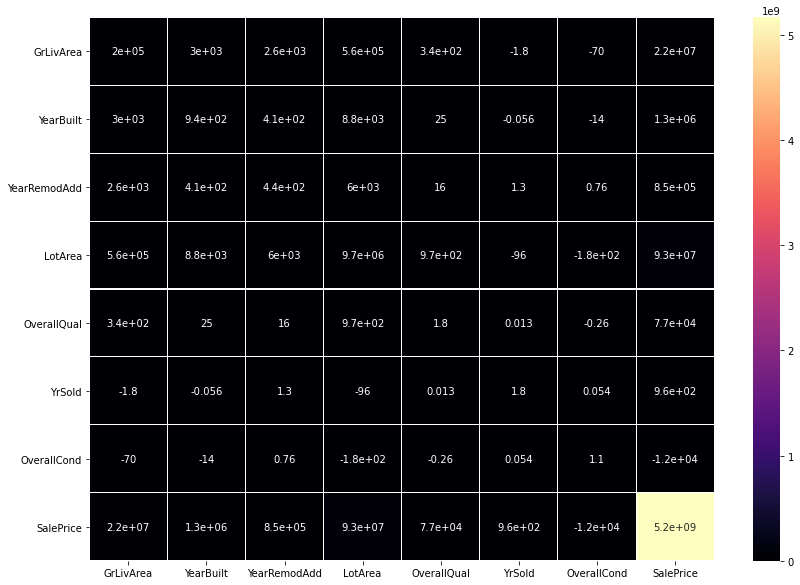

In [117]:
fig,ax = plt.subplots(figsize=(14, 10))

#sns.set(font_scale=1.4)
sns.heatmap(ames1.cov(), ax=ax, linewidths=0.05,cmap="magma",annot=True)
plt.show()

In [136]:
#Drop SalePrice column
XData=CleanData.drop(columns=['SalePrice'])
XData.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [137]:
X=XData.values

In [142]:
Y=CleanData.SalePrice.values.reshape(-1, 1)
len(Y)

1100

In [143]:
linear_regressor = LinearRegression()  # create object for the class
reg= linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  #
reg.coef_


array([[-7.28794015e-01, -1.03039125e+02,  3.54844090e+01,
         7.88516124e-01,  1.46507781e+04,  5.23070771e+03,
         3.43175885e+02,  2.15094622e+02,  2.00760100e+01,
         2.53038756e+01,  3.87858848e-01, -3.71683747e+00,
         2.19748970e+01,  2.20823859e+01,  2.70501155e+01,
        -2.22239418e+01,  2.69085596e+01, -4.56247508e+02,
        -7.17892074e+03, -1.66022630e+03, -2.01195933e+03,
        -1.18899665e+04, -2.23215859e+04,  5.30905849e+03,
         3.10358994e+03, -7.53455422e+00,  6.76797835e+03,
         2.58058529e+01,  9.50604522e+00,  3.26303757e+01,
         1.15680109e+01,  2.66034637e+01,  2.01966991e+01,
        -2.60718466e+01, -4.19207017e+00,  1.50587049e+02,
         1.60718256e+02]])

In [144]:
reg.intercept_

array([-1467419.01404243])

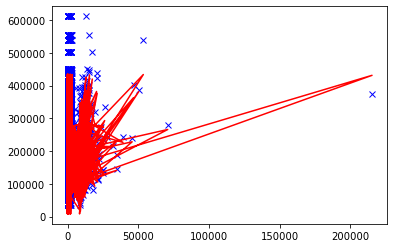

In [152]:

fig, ax = plt.subplots()
ax.plot(X,Y,'x',color='Blue')
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
##h(theta) = 

In [153]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, Y)

# Make predictions using the testing set
Y_pred = regr.predict(X)

print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y, Y_pred))

Coefficients: 
 [[-7.28794015e-01 -1.03039125e+02  3.54844090e+01  7.88516124e-01
   1.46507781e+04  5.23070771e+03  3.43175885e+02  2.15094622e+02
   2.00760100e+01  2.53038756e+01  3.87858848e-01 -3.71683747e+00
   2.19748970e+01  2.20823859e+01  2.70501155e+01 -2.22239418e+01
   2.69085596e+01 -4.56247508e+02 -7.17892074e+03 -1.66022630e+03
  -2.01195933e+03 -1.18899665e+04 -2.23215859e+04  5.30905849e+03
   3.10358994e+03 -7.53455422e+00  6.76797835e+03  2.58058529e+01
   9.50604522e+00  3.26303757e+01  1.15680109e+01  2.66034637e+01
   2.01966991e+01 -2.60718466e+01 -4.19207017e+00  1.50587049e+02
   1.60718256e+02]]
Mean squared error: 650301560.61
Coefficient of determination: 0.88
